In [32]:
from urllib.request import urlopen
import json
import pandas as pd
from pandas import json_normalize
import datetime
import matplotlib as plt
import geopandas as gpd
import descartes 
from shapely.geometry import point , Polygon
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


%matplotlib inline

In [6]:
col = ('OBJECTID', 'TICKET_NUMBER', 'ISSUE_DATE', 'ISSUE_TIME',
       'ISSUING_AGENCY_CODE', 'ISSUING_AGENCY_NAME', 'ISSUING_AGENCY_SHORT',
       'VIOLATION_CODE', 'VIOLATION_PROC_DESC', 'LOCATION', 'PLATE_STATE',
       'VEHICLE_TYPE', 'MULTI_OWNER_NUMBER', 'DISPOSITION_CODE',
       'DISPOSITION_TYPE', 'DISPOSITION_DESC', 'DISPOSITION_DATE',
       'FINE_AMOUNT', 'TOTAL_PAID', 'PENALTY_1', 'PENALTY_2', 'PENALTY_3',
       'PENALTY_4', 'PENALTY_5', 'XCOORD', 'YCOORD', 'LATITUDE', 'LONGITUDE',
       'MAR_ID', 'GIS_LAST_MOD_DTTM')

In [7]:
def downny(year, month):
    url = 'https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Violations_Parking_{}/MapServer/{}/query?where=1%3D1&outFields=*&outSR=4326&f=json'.format(year,month)
    response = urlopen(url)
    data_json = json.loads(response.read())
    df2 = json_normalize(data_json['features']) 
    df2.columns = [i.replace("attributes.", "") for i in df2.columns]
    df2["ISSUE_DATE"] = pd.to_datetime(df2["ISSUE_DATE"], unit='ms')
    return(df2)

In [8]:
all_res = []


In [10]:
for i in range(2015,2023):
    for j in range(0,12):
        try:
            data = downny(year= i, month= j)
            all_res.append(data)
            
        except Exception:
            pass

In [11]:
df_res = pd.DataFrame(data=None, columns= col)
df_res = pd.concat(all_res)
df_res.head()

,OBJECTID,TICKET_NUMBER,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROC_DESC,LOCATION,...,PENALTY_3,PENALTY_4,PENALTY_5,XCOORD,YCOORD,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM,VIOLATION_TYPE_DESC
0,60347462,260821536,2015-01-01 05:00:00,09:09 AM,4.0,METROPOLITAN POLICE DPT-DISTRICT 4,MPD-4D,P053,PARKED LESS THAN 3 FEET FROM ANOTHER VEHICLE,1410 QUINCY ST NW,...,NaN,None,None,397086.45,141094.68,38.938,-77.034,258989.0,1559103368000,NaN
1,60515584,265823460,2015-01-01 05:00:00,01:55 AM,3.0,METROPOLITAN POLICE DPT-DISTRICT 3,MPD-3D,P055,NO PARKING ANYTIME,2114 15TH ST NW,...,NaN,None,None,397001.10,138972.99,38.919,-77.035,810132.0,1559103368000,NaN
2,60611949,269532900,2015-01-01 05:00:00,02:10 AM,3.0,METROPOLITAN POLICE DPT-DISTRICT 3,MPD-3D,P055,NO PARKING ANYTIME,1336 U ST NW,...,NaN,None,None,397307.78,138768.39,38.917,-77.031,240381.0,1559103368000,NaN
3,60551219,267187012,2015-01-01 05:00:00,12:51 AM,5.0,METROPOLITAN POLICE DPT-DISTRICT 5,MPD-5D,P304,INDIVID W/ DISABILITIES ONLY UNAUTH. USE RSRVD SP,38 CHANNING ST NW,...,NaN,None,None,399084.60,139368.03,38.922,-77.011,228299.0,1559103368000,NaN
4,60579579,268026824,2015-01-01 05:00:00,None,3.0,METROPOLITAN POLICE DPT-DISTRICT 3,MPD-3D,P055,NO PARKING ANYTIME,1300 U ST NW,...,NaN,None,None,397403.11,138767.51,38.917,-77.030,243367.0,1559103368000,NaN


In [12]:
df_res['n'] = 1
df_res['month'] = pd.DatetimeIndex(df_res['ISSUE_DATE']).month
df_res['year'] = pd.DatetimeIndex(df_res['ISSUE_DATE']).year
df_res['combo'] = str(df_res['month'] )+ '-' + str(df_res['year'])



In [13]:
df_res.head()

,OBJECTID,TICKET_NUMBER,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROC_DESC,LOCATION,...,YCOORD,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM,VIOLATION_TYPE_DESC,n,month,year,combo
0,60347462,260821536,2015-01-01 05:00:00,09:09 AM,4.0,METROPOLITAN POLICE DPT-DISTRICT 4,MPD-4D,P053,PARKED LESS THAN 3 FEET FROM ANOTHER VEHICLE,1410 QUINCY ST NW,...,141094.68,38.938,-77.034,258989.0,1559103368000,NaN,1,1,2015,0 1\n1 1\n2 1\n3 1\n4 ...
1,60515584,265823460,2015-01-01 05:00:00,01:55 AM,3.0,METROPOLITAN POLICE DPT-DISTRICT 3,MPD-3D,P055,NO PARKING ANYTIME,2114 15TH ST NW,...,138972.99,38.919,-77.035,810132.0,1559103368000,NaN,1,1,2015,0 1\n1 1\n2 1\n3 1\n4 ...
2,60611949,269532900,2015-01-01 05:00:00,02:10 AM,3.0,METROPOLITAN POLICE DPT-DISTRICT 3,MPD-3D,P055,NO PARKING ANYTIME,1336 U ST NW,...,138768.39,38.917,-77.031,240381.0,1559103368000,NaN,1,1,2015,0 1\n1 1\n2 1\n3 1\n4 ...
3,60551219,267187012,2015-01-01 05:00:00,12:51 AM,5.0,METROPOLITAN POLICE DPT-DISTRICT 5,MPD-5D,P304,INDIVID W/ DISABILITIES ONLY UNAUTH. USE RSRVD SP,38 CHANNING ST NW,...,139368.03,38.922,-77.011,228299.0,1559103368000,NaN,1,1,2015,0 1\n1 1\n2 1\n3 1\n4 ...
4,60579579,268026824,2015-01-01 05:00:00,None,3.0,METROPOLITAN POLICE DPT-DISTRICT 3,MPD-3D,P055,NO PARKING ANYTIME,1300 U ST NW,...,138767.51,38.917,-77.030,243367.0,1559103368000,NaN,1,1,2015,0 1\n1 1\n2 1\n3 1\n4 ...


!conda install --yes plotly 
!conda install --yes plotly.express

<AxesSubplot:>

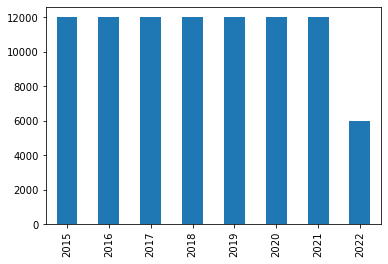

In [15]:
df_res.year.value_counts().plot(kind='bar')


In [16]:
df_res.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OBJECTID,90000.0,7.471376e+07,5.442247e+06,6.032163e+07,7.330580e+07,7.625880e+07,7.875451e+07,8.013247e+07
ISSUING_AGENCY_CODE,89999.0,1.484923e+01,7.420890e+00,1.000000e+00,1.500000e+01,1.500000e+01,1.500000e+01,9.800000e+01
DISPOSITION_CODE,31103.0,2.512639e+01,4.004455e+01,0.000000e+00,0.000000e+00,1.300000e+01,1.300000e+01,5.200000e+02
DISPOSITION_DATE,22599.0,1.505274e+12,4.833075e+10,1.420434e+12,1.467432e+12,1.504498e+12,1.535774e+12,1.648699e+12
FINE_AMOUNT,87367.0,6.079254e+01,5.165661e+01,0.000000e+00,3.000000e+01,5.000000e+01,1.000000e+02,1.100000e+03
TOTAL_PAID,90000.0,3.664596e+01,5.310132e+01,0.000000e+00,0.000000e+00,3.000000e+01,5.000000e+01,2.400000e+03
XCOORD,88289.0,3.980392e+05,2.472418e+03,3.900975e+05,3.965262e+05,3.977002e+05,3.994214e+05,4.078068e+05
YCOORD,88289.0,1.376086e+05,2.459351e+03,1.274737e+05,1.364761e+05,1.373541e+05,1.387759e+05,1.472907e+05
LATITUDE,88289.0,3.890633e+01,2.216036e-02,3.881500e+01,3.889600e+01,3.890400e+01,3.891700e+01,3.899400e+01
LONGITUDE,88289.0,-7.702264e+01,2.851607e-02,-7.711400e+01,-7.704000e+01,-7.702700e+01,-7.700700e+01,-7.691000e+01


In [27]:

# Read file using gpd.read_file()
data = gpd.read_file('./Washington_DC_Boundary/Washington_DC_Boundary.shp')


In [28]:
data.geometry

0    POLYGON ((-77.11980 38.93435, -77.11979 38.934...
Name: geometry, dtype: geometry

In [31]:
!pip install pyshp

     |████████████████████████████████| 46 kB 2.7 MB/s eta 0:00:011


In [29]:
data.head()

,OBJECTID,CITY_NAME,STATE_CITY,CAPITAL,WEB_URL,AREAKM,AREAMILES,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,SHAPEAREA,SHAPELEN,geometry
0,1,Washington,1150000,Y,http://www.dc.gov,177.47,68.52,DCBndyPly_1,{ED39E1E0-B1E5-4B42-BE73-1C737B39E5CA},None,None,None,None,0,0,"POLYGON ((-77.11980 38.93435, -77.11979 38.934..."


KeyError: "None of [Index(['MPD-4D', 'MPD-3D', 'MPD-3D', 'MPD-5D', 'MPD-3D', 'MPD-3D', 'MPD-3D',\n       'MPD-3D', 'MPD-3D', 'MPD-3D',\n       ...\n          'DPW',    'DPW',    'DPW',    'DPW',    'DPW',    'DPW',    'DPW',\n          'DPW',    'DPW',    'DPW'],\n      dtype='object', length=90000)] are in the [columns]"

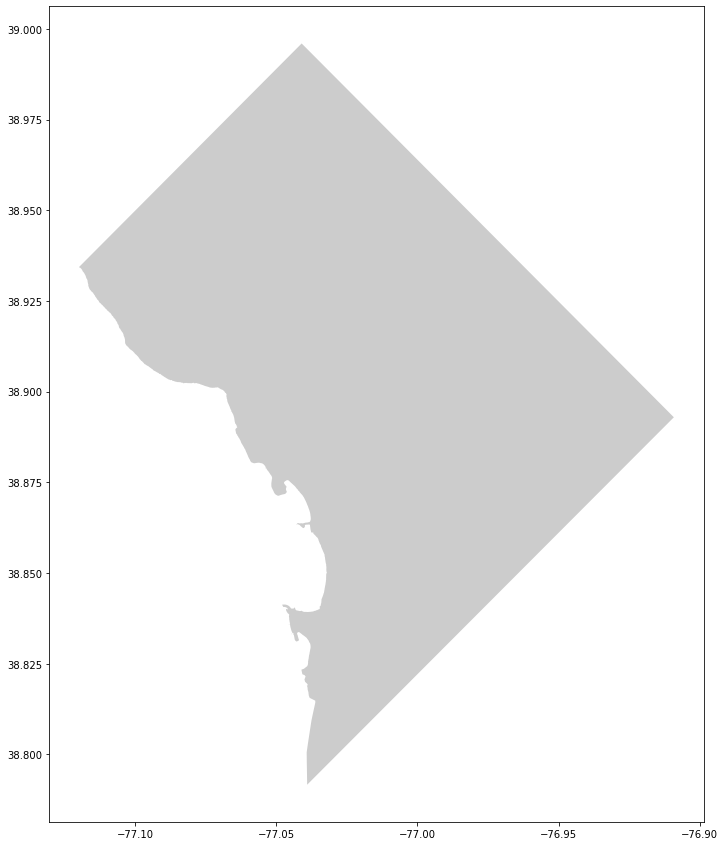

In [30]:
fig, ax = plt.pyplot.subplots(figsize=(15,15))
data.plot(ax = ax , alpha = 0.4, color = 'grey')
df_res[df_res['ISSUING_AGENCY_SHORT']].plot(ax = ax , alpha = 0.4, color = 'grey')

In [34]:
import seaborn as sns


In [42]:
sns.set(style='whitegrid', palette='pastel', color_codes=True) 
sns.mpl.rc('figure', figsize=(10,6))
sf = shp.Reader('./Washington_DC_Boundary/Washington_DC_Boundary.shp')


In [43]:
sf.record()

Record #0: [1, 'Washington', 1150000, 'Y', 'http://www.dc.gov', 177.47, 68.52, 'DCBndyPly_1', '{ED39E1E0-B1E5-4B42-BE73-1C737B39E5CA}', '', '', '', '', 0, 0]